# Chapter 3: It starts with a tensor


## Purpose:
- Understanding tensors, the basic data structure in PyTorch
- Indexing and operating on tensors
- Interoperating with NumPy multidimensional arrays
- Moving computations to the GPU for speed


Deep learning invariably consisted of taking data in some form, like images or text, and producing data in another form, like labels, numbers, or more images or text. Deep learning really consists of building a system that can transform data from one representation to another. 

In this summary, we will learn how to deal with all the floating-point numbers in PyTorch by using tensors.

The deep learning  process begins by converting  **input** into **floating-point** numbers(like converting image pixels to number). **Figure 1** demonstaret  a  deep neural network learns how to transform an input representation to an output representation. 

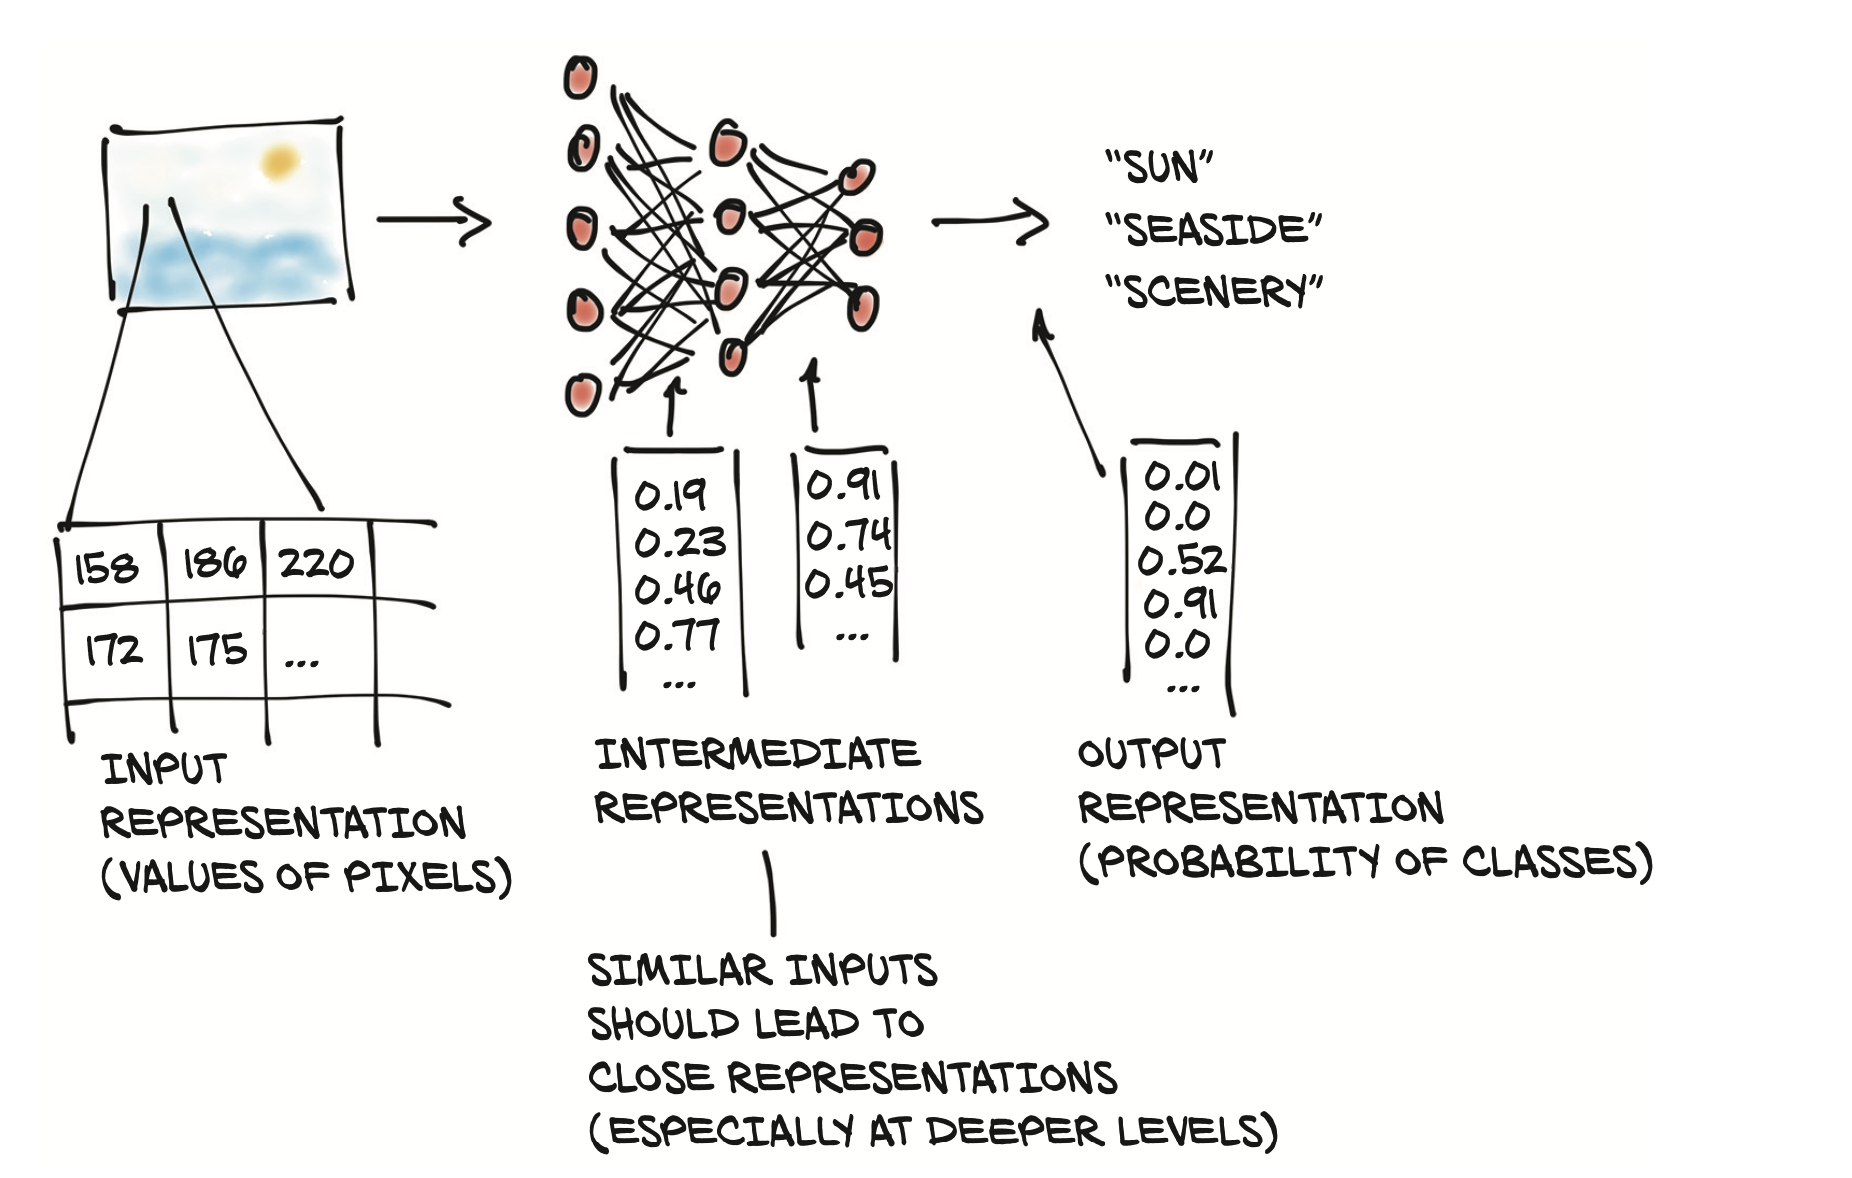

In [8]:
from IPython import display
display.Image("fig_1.png")

###   Compared to NumPy arrays, PyTorch tensors

Compared to **NumPy arrays**, **PyTorch tensors** have a few superpowers, such as:

- 1- the ability to perform very fast operations on graphical processing units (GPUs), 
- 2-distribute operations on multiple devices or machines, 
- 3- and keep track of the graph of computations that created them. 

These are all important features when implementing a modern deep learning library.

### The world as floating-point numbers


Since floating-point numbers are the way a network deals with information, we need a way to encode real-world data of the kind we want to process into something digestible by a network and then decode the output back to something we can understand and use for our purpose.

A deep neural network typically learns the transformation from one form of data to another in stages, which means the partially transformed data between each stage can be thought of as a sequence of intermediate representations. For image recognition, early representations can be things such as edge detection or certain textures like fur. Deeper representations can capture more complex structures like ears, noses, or eyes.

## What is tensor:

Tensors, as a fundamental data structure,  are the building blocks for representing data in PyTorch. In the context of deep learning, tensors refer to the generalization of vectors and matrices to an arbitrary number of dimensions, as we can see in **figure 2**. Another name for the same concept is **multidimensional array**. The dimensionality of a tensor coincides with the number of indexes used to refer to scalar values within the tensor.

Tensors are similar to NumPy’s ndarrays, except that tensors can run on GPUs or other hardware accelerators. In fact, tensors and NumPy arrays can often share the same underlying memory, eliminating the need to copy data. Tensors are also optimized for automatic differentiation.

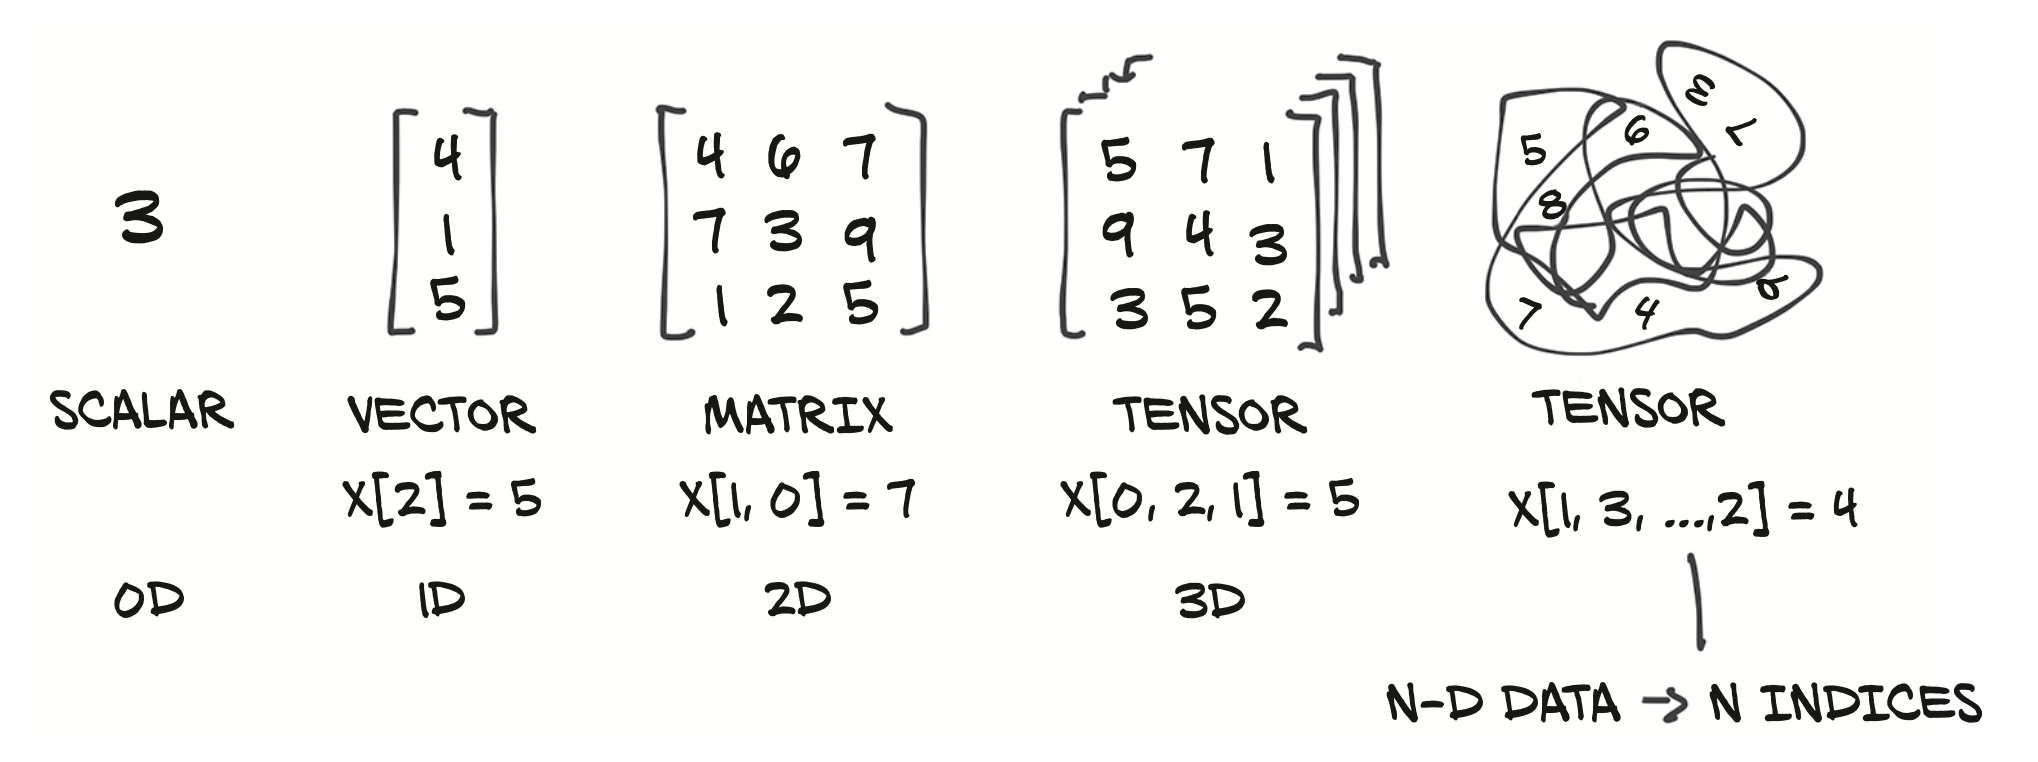

In [2]:
display.Image("fig_2.png")

PyTorch is not the only library that deals with multidimensional arrays. NumPy is by far the most popular multidimensional array library, to the point that it has now arguably become the lingua franca of data science. PyTorch features seamless interoperability with NumPy, which brings with it first-class integration with the rest of the scientific libraries in Python, such as SciPy (www.scipy.org), Scikit-learn (https://scikit-learn .org), and Pandas (https://pandas.pydata.org).

First and foremost, we’ll learn  how to manipulate tensors using the PyTorch tensor library. This includes things like 
-  1- how the data is stored in memory,
- 2- how certain operations can be performed on arbitrarily large tensors in constant time, 
- 3- and the aforementioned NumPy interoperability and GPU acceleration. 

Also, Understanding the capabilities and API of tensors is important if they’re to become go-to tools in our programming toolbox. 

### Tensors: Multidimensional arrays
 A tensor is an array that stores a collection of numbers and thoese components are accessible individually using an index. Also, they can  be indexed with multiple indices.

####  Constructing our first tensors
Let’s construct our first PyTorch tensor and see what it looks like.

After importing the torch module, we call a function that creates a (one-dimensional 1D) tensor of size 3 filled with the value 1.0. We can access an element using its zero-based index or assign a new value to it.

In [4]:
import torch # Imports the torch module
a = torch.ones(3) # Creates a one-dimensional tensor of size 3 filled with 1s
print(a)
print(a[1])
print(float(a[1]))

tensor([1., 1., 1.])
tensor(1.)
1.0


In [5]:
a[2] = 2.0
a

tensor([1., 1., 2.])

####  The essence of tensors

Python lists or tuples of numbers are collections of Python objects that are individually allocated in memory, as shown on the left in figure 3. PyTorch tensors or NumPy arrays, on the other hand, are views over (typically) contiguous memory blocks containing unboxed C numeric types rather than Python objects. Each element is a 32-bit (4-byte) float in this case, as we can see on the right side of figure 3. This means storing a 1D tensor of 1,000,000 float numbers will require exactly 4,000,000 contiguous bytes, plus a small overhead for the metadata (such as dimensions and numeric type).

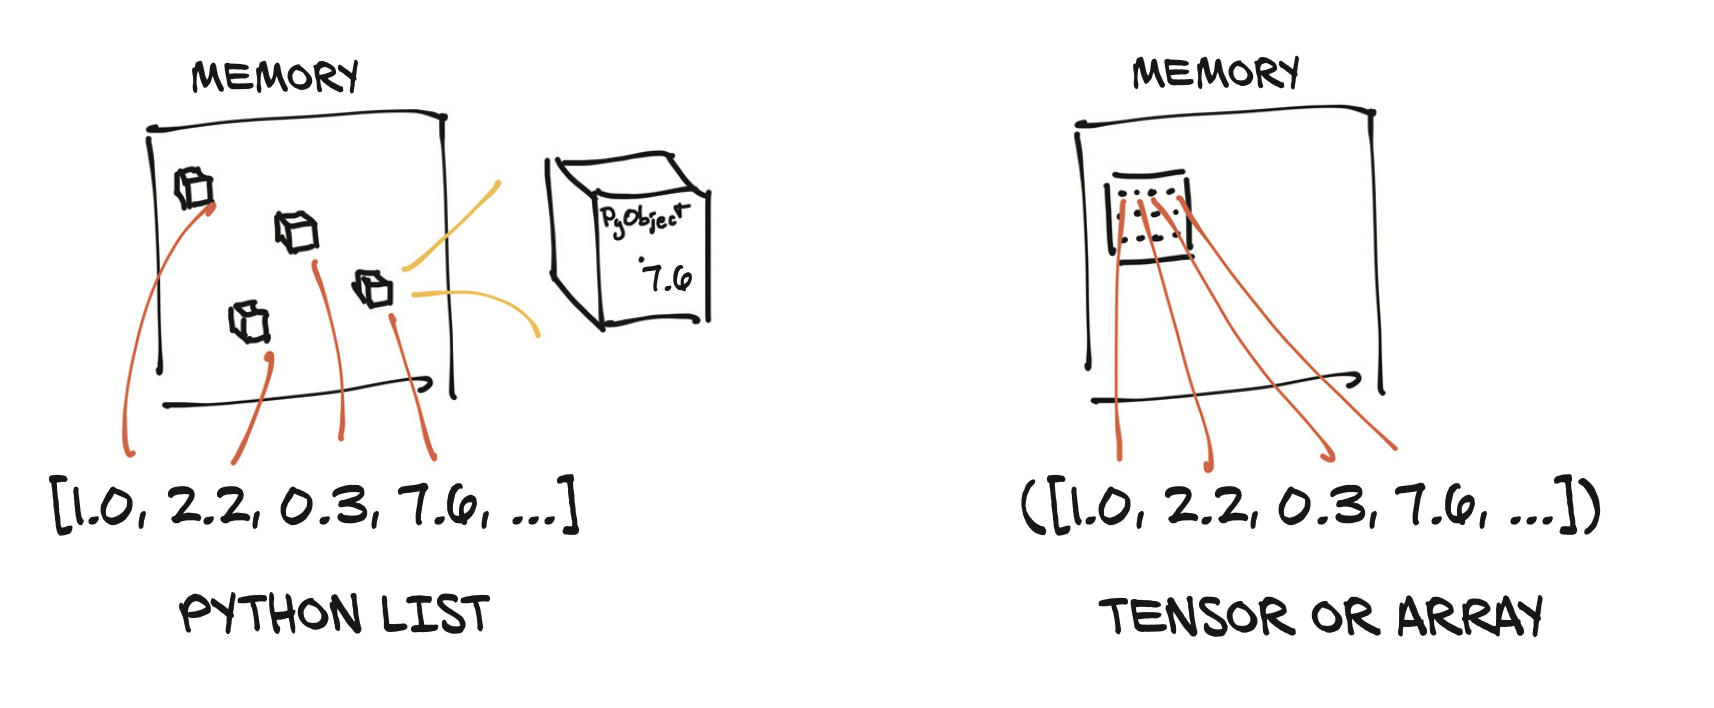

In [9]:
display.Image("fig_3.png")

#### Example:

Let say we have a list of coordinates, we’d like to use to represent a geometrical object: perhaps a 2D triangle with vertices at coordinates (4, 1), (5, 3), and (2, 1).

Instead of having coordinates as numbers in a Python list,  we can use a  one-dimensional tensor by storing Xs in the even indices and Ys in the odd indices, like this:

In [7]:
#  1- 
points = torch.zeros(6) # Using .zeros is just a way to get an appropriately sized array.
points[0] = 4.0  # We overwrite those zeros with the values we actually want.
points[1] = 1.0 
points[2] = 5.0 
points[3] = 3.0 
points[4] = 2.0 
points[5] = 1.0 
points

tensor([4., 1., 5., 3., 2., 1.])

We can also pass a Python list to the constructor, to the same effect:

In [7]:
#  2- 
points = torch.tensor([4.0, 1.0, 5.0, 3.0, 2.0, 1.0])
points

tensor([4., 1., 5., 3., 2., 1.])

To get the coordinates of the first point, we do the following:

In [8]:
float(points[0]), float(points[1])

(4.0, 1.0)

This is OK, although it would be practical to have the first index refer to individual 2D points rather than point coordinates. For this, we can use a 2D tensor:

Here, we pass a list of lists to the constructor

In [9]:
#  3- 
points = torch.tensor([[4.0, 1.0],[5.0, 3.0],[2.0, 1.0]])
print(points)
print(points.shape)

tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
torch.Size([3, 2])


We could also use zeros or ones to initialize the tensor, providing the size as a tuple:

In [10]:
#  4- 
points = torch.zeros(3, 2) # This is a 2D tensor with size 3(3 samples) 
print(points)
points = torch.tensor([[4.0, 1.0],[5.0, 3.0],[2.0, 1.0]])
print(points)

tensor([[0., 0.],
        [0., 0.],
        [0., 0.]])
tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])


Now we can access an individual element in the tensor using two indices:

In [11]:
print(points[0, 1]) # This returns the Y-coordinate of the zeroth point in our dataset
print(points[0]) # We can also access the first element in the tensor 
                #as we did before to get the 2D coordinates of the first point:

tensor(1.)
tensor([4., 1.])


The output is another tensor that presents a different view of the same underlying data. The new tensor is a 1D tensor of size 2, referencing the values of the first row in the points tensor.  

####  Indexing tensors
In order to get access to the  info in a tensor we can use indexing.
 Here’s a reminder:

In [12]:
some_list = list(range(6))
print('******some_list[:]********')
print(some_list[:])     # All elements in the list

print('******some_list[1:4]********')
print(some_list[1:4])   # From element 1 inclusive to element 4 exclusive

print('******ssome_list[1:]********')
print(some_list[1:])    # From element 1 inclusive to the end of the list

print('******some_list[:4]********')
print(some_list[:4])    # From the start of the list to element 4 exclusive

print('******some_list[:-1]********')
print(some_list[:-1])   # From the start of the list to one before the last element

print('******some_list[1:4:2]********')
print(some_list[1:4:2]) # From element 1 inclusive to element 4 exclusive, in steps of 2


******some_list[:]********
[0, 1, 2, 3, 4, 5]
******some_list[1:4]********
[1, 2, 3]
******ssome_list[1:]********
[1, 2, 3, 4, 5]
******some_list[:4]********
[0, 1, 2, 3]
******some_list[:-1]********
[0, 1, 2, 3, 4]
******some_list[1:4:2]********
[1, 3]


To achieve our goal, we can use the same notation for PyTorch tensors, with the added benefit that, just as in NumPy and other Python scientific libraries, we can use range indexing for each of the tensor’s dimensions:

In [13]:
print('******points********')
print(points)

print('******points[1:]*******')
print(points[1:]) # All rows after the first; implicitly all columns

print('******points[1:, :]********')
print(points[1:, :]) # All rows after the first; all columns

print('******points[1:, 0]********')
print(points[1:, 0]) # All rows after the first; first column

print('******points[None]********')
print(points[None])# Adds a dimension of size 􏰁, just like unsqueeze

******points********
tensor([[4., 1.],
        [5., 3.],
        [2., 1.]])
******points[1:]*******
tensor([[5., 3.],
        [2., 1.]])
******points[1:, :]********
tensor([[5., 3.],
        [2., 1.]])
******points[1:, 0]********
tensor([5., 2.])
******points[None]********
tensor([[[4., 1.],
         [5., 3.],
         [2., 1.]]])


###  Named tensors


The dimensions (or axes) of our tensors usually index something like pixel locations or color channels. This means when we want to index into a tensor, we need to remember the ordering of the dimensions and write our indexing accordingly. As data is transformed through multiple tensors, keeping track of which dimension con-tains what data can be error prone.

To make things concrete, imagine that we have a 3D tensor like img_t from section , and we want to convert it to gray- scale. We looked up typical weights for the colors to derive a single brightness value:


In [14]:
img_t = torch.randn(3, 5, 5) # shape [channels, rows, columns]
weights = torch.tensor([0.2126, 0.7152, 0.0722])


We also often want our code to generalize—for example, from grayscale images represented as 2D tensors with height and width dimensions to color images adding a third channel dimension (as in RGB), or from a single image to a batch of images. Here we assume that we   have a batch of 2:

In [15]:
batch_t = torch.randn(2, 3, 5, 5) # shape [batch, channels, rows, columns]

So sometimes the RGB channels are in dimension **0**, and sometimes they are in dimension **1**. But we can generalize by counting from the end: they are always in dimension **–3**, the third from the end. The lazy, unweighted mean can thus be written as follows:

In [17]:
img_gray_naive = img_t.mean(-3)
batch_gray_naive = batch_t.mean(-3)
img_gray_naive.shape, batch_gray_naive.shape

(torch.Size([5, 5]), torch.Size([2, 5, 5]))

But now we have the weight, too. PyTorch will allow us to multiply things that are the same shape, as well as shapes where one operand is of size **1** in a given dimension. It also appends leading dimensions of size **1** automatically. This is a feature called broadcasting. batch_t of shape **(2, 3, 5, 5)** is multiplied by unsqueezed_weights of shape **(3, 1, 1)**, resulting in a tensor of shape **(2, 3, 5, 5)**, from which we can then sum the third dimension from the end (the three channels):

In [19]:
unsqueezed_weights = weights.unsqueeze(-1).unsqueeze_(-1)
img_weights = (img_t * unsqueezed_weights)
batch_weights = (batch_t * unsqueezed_weights)
img_gray_weighted = img_weights.sum(-3)
batch_gray_weighted = batch_weights.sum(-3)
batch_weights.shape, batch_t.shape, unsqueezed_weights.shape

(torch.Size([2, 3, 5, 5]), torch.Size([2, 3, 5, 5]), torch.Size([3, 1, 1]))

Because this gets messy quickly and for the sake of efficiency, the PyTorch function **$einsum$** (adapted from NumPy) specifies an indexing mini-language giving index names to dimensions for sums of such products. As often in Python, broadcasting—a form of summarizing unnamed things—is done using three dots **'...'**; but don’t worry too much about einsum, because we will not use it in the following:

In [21]:
img_gray_weighted_fancy = torch.einsum('...chw,c->...hw', img_t, weights)
batch_gray_weighted_fancy = torch.einsum('...chw,c->...hw', batch_t, weights)
batch_gray_weighted_fancy.shape

torch.Size([2, 5, 5])

As we can see, there is quite a lot of bookkeeping involved. This is error-prone, especially when the locations where tensors are created and used are far apart in our code. This has caught the eye of practitioners, and so it has been suggested that the dimension be given a name instead.


### More to read

- TENSORS
https://pytorch.org/tutorials/beginner/basics/tensorqs_tutorial.html#:~:text=Tensors%20are%20a%20specialized%20data,GPUs%20or%20other%20hardware%20accelerators.


- TensorFlow Core APIs overview
https://www.tensorflow.org/guide/core#:~:text=The%20TensorFlow%20Core%20APIs%20provide%20access%20to%20low%20level%20functionality,level%20APIs%2C%20such%20as%20Keras.


- PYTORCH DOCUMENTATION
https://pytorch.org/docs/stable/index.html